In [106]:
import pandas as pd
from pandas.tseries.offsets import *

import numpy

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')

In [85]:
iperf = pd.read_csv('../results/2017-03-03-across-my-office/iperf-132700_munged.txt', 
                    names=["date","MBsec","retries"],
                   parse_dates=["date"])
iperf = iperf.set_index('date')
iperf = iperf.tz_localize('US/Pacific')
iperf = iperf.tz_convert('UTC')


print(iperf)

                           MBsec  retries
date                                     
2017-03-03 21:27:56+00:00  144.0       54
2017-03-03 21:27:57+00:00  136.0        2
2017-03-03 21:27:58+00:00  126.0        0
2017-03-03 21:27:59+00:00  126.0        0
2017-03-03 21:28:00+00:00  126.0        3
2017-03-03 21:28:01+00:00  115.0        0
2017-03-03 21:28:02+00:00  105.0        2
2017-03-03 21:28:03+00:00  115.0        0
2017-03-03 21:28:04+00:00   94.4       17
2017-03-03 21:28:05+00:00  105.0        0
2017-03-03 21:28:06+00:00  126.0        0
2017-03-03 21:28:07+00:00   94.4        1
2017-03-03 21:28:08+00:00   83.9        3
2017-03-03 21:28:09+00:00   73.4       10
2017-03-03 21:28:10+00:00   62.9        6
2017-03-03 21:28:11+00:00   73.4        2
2017-03-03 21:28:12+00:00  105.0        0
2017-03-03 21:28:13+00:00   94.4        0
2017-03-03 21:28:14+00:00  115.0        0
2017-03-03 21:28:15+00:00  105.0        7
2017-03-03 21:28:16+00:00  105.0        1
2017-03-03 21:28:17+00:00   94.4  

In [123]:
def p2f(x):
    return float(x.strip('%'))/100

stimpy = pd.read_json('../results/2017-03-03-across-my-office/stimpy_20170303_131800_munged.json')
stimpy['date'] = pd.to_datetime(stimpy['date'], errors='raise', format='%b %d %H:%M:%S') + \
                     DateOffset(years=117)
stimpy = stimpy.set_index('date')
stimpy = stimpy.tz_localize('UTC')
stimpy['tx-ccq'] = stimpy['tx-ccq'].map( p2f )
stimpy['rx-ccq'] = stimpy['rx-ccq'].map( p2f )

ren = pd.read_json('../results/2017-03-03-across-my-office/ren_20170303_131800_munged.json')
ren['date'] = pd.to_datetime(ren['date'], errors='raise', format='%b %d %H:%M:%S') + \
                     DateOffset(years=117)
ren = ren.set_index('date')
ren = ren.tz_localize('US/Pacific')
ren = ren.tz_convert('UTC')
ren['tx-ccq'] = ren['tx-ccq'].map( p2f )
ren['rx-ccq'] = ren['rx-ccq'].map( p2f )

In [124]:

stimpy = stimpy[ iperf.index.min() : iperf.index.max() ]
ren = ren[ iperf.index.min() : iperf.index.max() ]


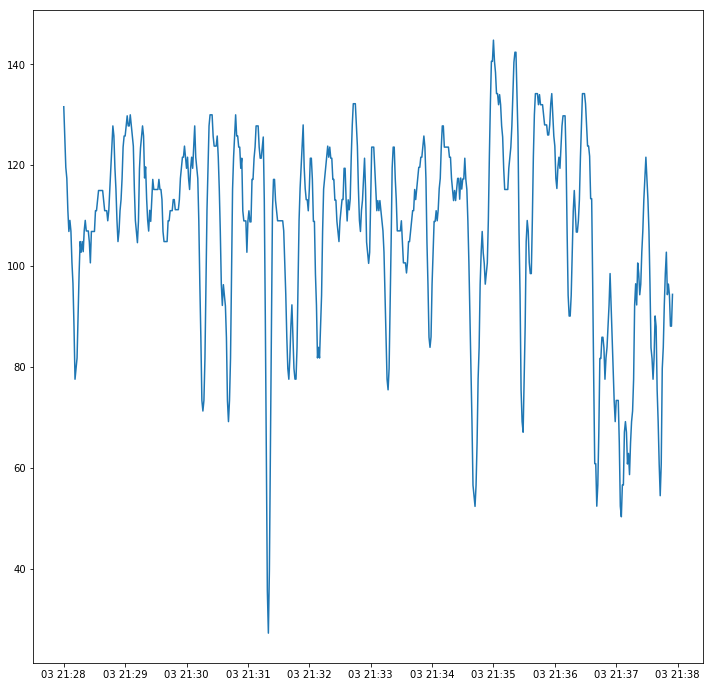

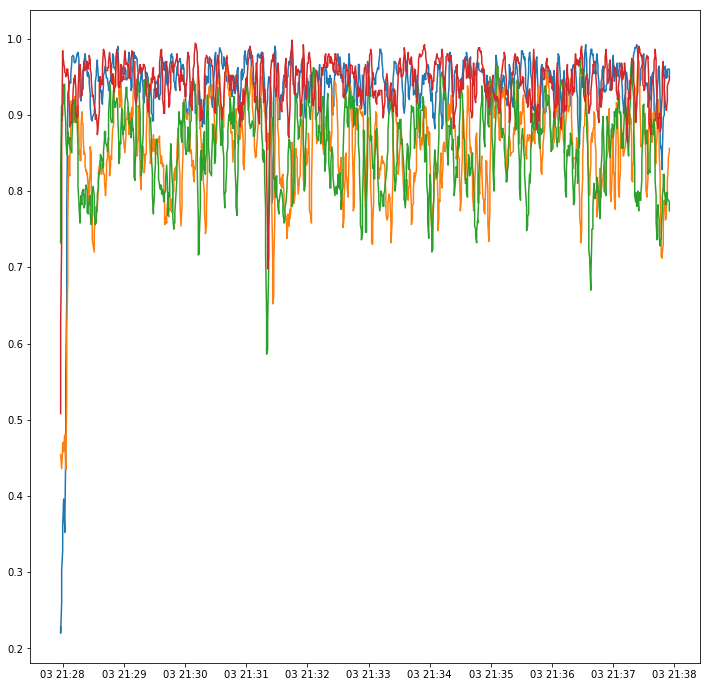

In [128]:
plt.figure( figsize=(12,12));

MBsec_avg = iperf['MBsec'].rolling(5).mean()
plt.plot( iperf.index, MBsec_avg)

plt.figure(figsize=(12,12));
plt.plot( stimpy.index, stimpy['tx-ccq'].rolling(5).mean() )
plt.plot( stimpy.index, stimpy['rx-ccq'].rolling(5).mean() )
plt.plot( ren.index, ren['tx-ccq'].rolling(5).mean() )
plt.plot( ren.index, ren['rx-ccq'].rolling(5).mean() )